## Pseudo random number generator

In the first part of this project, a linear congruent generator is created generate numbers drawn from a uniform distribution of numbers between 0 and 1. 

Randomness for the linear congruent generator and Mersenne Twister is first tested by plotting 2i+1-th terms against 2i-th terms.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

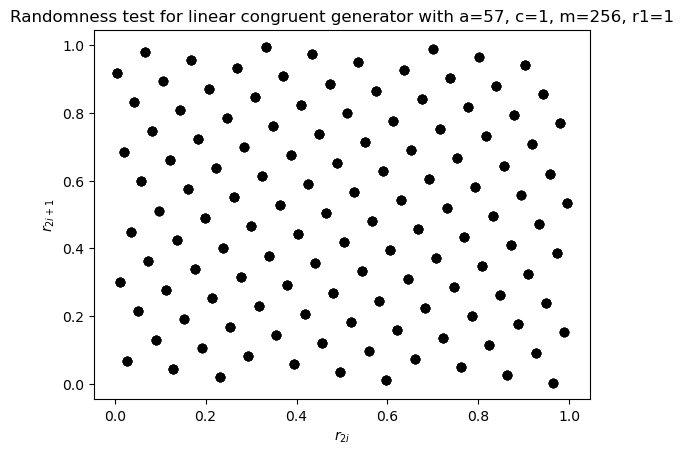

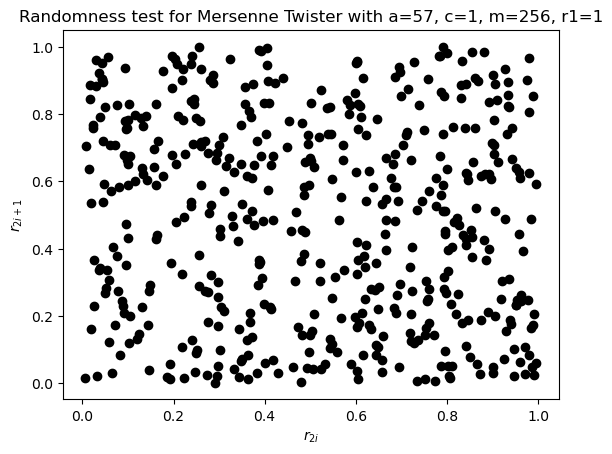

In [27]:
#define linear congruent generator
def lcg(a, c, m, seed):
    i = seed*m
    while True:
        i = (a * i + c) % m
        yield i / m

#create 1000 values, i.e. up to r_1000
lcg = lcg(a=57, c=1, m=256, seed=1)
lcg_x = [next(lcg) for _ in range(1000)]

#remove half of the elements, keep only r_2i
n = len(lcg_x)
lcg_xnew = lcg_x[::2][:n//2]

#replenish the generator
def lcg(a, c, m, seed):
    i = seed
    while True:
        i = (a * i + c) % m
        yield i / m

#create 1001 values, i.e. up to r_1001
lcg = lcg(a=57, c=1, m=256, seed=1)
lcg_y = [next(lcg) for _ in range(1001)]

#remove first element
del lcg_y[0]

#remove half of the elements, keep only r_2i+1
n = len(lcg_y)
lcg_ynew = lcg_y[::2][:n//2]

plt.figure()
plt.plot(lcg_xnew,lcg_ynew,'ko')
plt.title('Randomness test for linear congruent generator with a=57, c=1, m=256, r1=1')
plt.xlabel('$r_{2i}$')
plt.ylabel('$r_{2i+1}$')
plt.show()

#Mersenne Twister
np.random.seed(None)
mt_x = [np.random.random() for _ in range(1001)]
mt_y = mt_x.copy()

del mt_x[-1]
del mt_y[0]

n = len(mt_x)
mt_xnew = mt_x[::2][:n//2] #remove half of the elements, keep only r_2i
mt_ynew = mt_y[::2][:n//2] #remove half of the elements, keep only r_2i+1

plt.figure()
plt.plot(mt_xnew,mt_ynew,'ko')
plt.title('Randomness test for Mersenne Twister with a=57, c=1, m=256, r1=1')
plt.xlabel('$r_{2i}$')
plt.ylabel('$r_{2i+1}$')
plt.show()

As can be seen from the plots above, a pattern can be seen in the case of LCG but not for the Mersenne Twister. Therefore, it can be concluded that the LCG does not actually generate random numbers.

In the section below, randomness is tested by comparing sample moments and theoretical moments, and also shows that they do not converge.

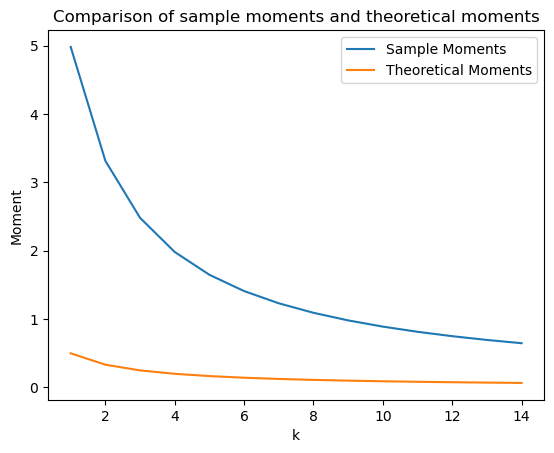

In [31]:
#define linear congruent generator
def lcg(a, c, m, seed):
    i = seed*m
    while True:
        i = (a * i + c) % m
        yield i / m

#create 1000 values, i.e. up to r_1000
lcg = lcg(a=57, c=1, m=256, seed=1)
lcg_list = [next(lcg) for _ in range(1000)]

# calculate moments
N = len(lcg_list)
moments = []
for k in range(1, 15):
    moment = sum(np.power(r_list, k)) / N
    moments.append(moment)

# calculate theoretical moments for a continuous uniform distribution
theoretical_moments = [1/(k+1) for k in range(1, 15)]

# plot results
plt.plot(range(1, 15), moments, label='Sample Moments')
plt.plot(range(1, 15), theoretical_moments, label='Theoretical Moments')
plt.legend()
plt.title('Comparison of sample moments and theoretical moments')
plt.xlabel('k')
plt.ylabel('Moment')
plt.show()

## Persistent random walk

In this section, persistent random walk is implemented.

In [36]:
def prw(alpha, N, x0, d0):
    x = x0
    d = d0
    x_list = [x]
    for i in range(N):
        r = np.random.rand()
        if r < alpha:
            x += d
        else:
            x -= d
        x_list.append(x)
        # flip the direction with probability 0.5
        if np.random.rand() < 0.5:
            d *= -1
    # calculate the mean position and mean square displacement
    x_mean = np.mean(x_list)
    dx = np.diff(x_list)
    dx_mean = np.mean(dx**2)
    return x_mean, dx_mean

print('For alpha = 0.25 and N = 8, 64, 256, 512')

alpha = 0.25
N = 8
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

alpha = 0.25
N = 64
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

alpha = 0.25
N = 256
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

alpha = 0.25
N = 512
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

print('For alpha = 0.75 and N = 8, 64, 256, 512')

alpha = 0.75
N = 8
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

alpha = 0.75
N = 64
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

alpha = 0.75
N = 256
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

alpha = 0.75
N = 512
x0 = 0
d0 = 1
x_mean, dx_mean = prw(alpha, N, x0, d0)
print("⟨x⟩ =", x_mean)
print("∆x^2 =", dx_mean)

For alpha = 0.25 and N = 8, 64, 256, 512
⟨x⟩ = -1.1111111111111112
∆x^2 = 1.0
⟨x⟩ = 7.753846153846154
∆x^2 = 1.0
⟨x⟩ = -3.291828793774319
∆x^2 = 1.0
⟨x⟩ = -15.617933723196881
∆x^2 = 1.0
For alpha = 0.75 and N = 8, 64, 256, 512
⟨x⟩ = 0.4444444444444444
∆x^2 = 1.0
⟨x⟩ = 0.0
∆x^2 = 1.0
⟨x⟩ = 1.6108949416342413
∆x^2 = 1.0
⟨x⟩ = 1.4113060428849902
∆x^2 = 1.0
